# Sales Analysis

## About

This project is based in this [Keith Galli's video](https://www.youtube.com/watch?v=eMOA1pPVUc4).

---

## Setting up the environment

Let's start importing the packages that we will use in this notebook and setting some options.

In [1]:
import calendar
import glob
import itertools

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
%matplotlib inline

pd.set_option('display.max_rows', 10)
pd.set_option('display.precision', 2)

sns.set_theme(context='talk', style='darkgrid', palette='husl')

---

## Reading the data

In the folder ```data``` there is the files that we will use in this project. Let's grab the path for all this files using the ```glob``` module.

In [3]:
paths = sorted(glob.glob('data/sales_[0-1][0-9].csv'))
paths

['data/sales_01.csv',
 'data/sales_02.csv',
 'data/sales_03.csv',
 'data/sales_04.csv',
 'data/sales_05.csv',
 'data/sales_06.csv',
 'data/sales_07.csv',
 'data/sales_08.csv',
 'data/sales_09.csv',
 'data/sales_10.csv',
 'data/sales_11.csv',
 'data/sales_12.csv']

Let's read and concatenate them all in a single ```DataFrame``` called ```sales```.

In [4]:
sales = pd.concat([pd.read_csv(path) for path in paths])
sales

,order_id,product,quantity_ordered,price_each,order_date,purchase_address
0,141234,iPhone,1,700,01/22 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11 20:58,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.84,12/01 12:01,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400,12/09 06:43,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99,12/03 10:39,"778 River St, Dallas, TX 75001"


---

## Cleaning the data

In this step for cleaning the data, we start searching for ```NaN``` values.

In [5]:
sales[sales.isna().any(axis=1)]

,order_id,product,quantity_ordered,price_each,order_date,purchase_address
664,NaN,NaN,NaN,NaN,NaN,NaN
678,NaN,NaN,NaN,NaN,NaN,NaN
797,NaN,NaN,NaN,NaN,NaN,NaN
876,NaN,NaN,NaN,NaN,NaN,NaN
1299,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
22945,NaN,NaN,NaN,NaN,NaN,NaN
22962,NaN,NaN,NaN,NaN,NaN,NaN
23309,NaN,NaN,NaN,NaN,NaN,NaN
23996,NaN,NaN,NaN,NaN,NaN,NaN


Looks that there is entire rows with ```NaN``` values. Let's drop these rows.

In [6]:
sales = sales.dropna(how='all')

Inspecting ```sales```, we end up seeing that for some reason there is rows that are the columns names.

In [7]:
sales[sales['product'] == 'product']

,order_id,product,quantity_ordered,price_each,order_date,purchase_address
1073,order_id,product,quantity_ordered,price_each,order _date,purchase_address
1102,order_id,product,quantity_ordered,price_each,order _date,purchase_address
1194,order_id,product,quantity_ordered,price_each,order _date,purchase_address
1897,order_id,product,quantity_ordered,price_each,order _date,purchase_address
2463,order_id,product,quantity_ordered,price_each,order _date,purchase_address
...,...,...,...,...,...,...
23198,order_id,product,quantity_ordered,price_each,order _date,purchase_address
23337,order_id,product,quantity_ordered,price_each,order _date,purchase_address
23748,order_id,product,quantity_ordered,price_each,order _date,purchase_address
24192,order_id,product,quantity_ordered,price_each,order _date,purchase_address


Again, let's drop these rows.

In [8]:
sales = sales[sales['product'] != 'product']

The last task in this step is check out for duplicate rows.

In [9]:
sales[sales.duplicated()]

,order_id,product,quantity_ordered,price_each,order_date,purchase_address
875,142071,AA Batteries (4-pack),1,3.84,01/17 23:02,"131 2nd St, Boston, MA 02215"
4126,145143,Lightning Charging Cable,1,14.95,01/06 03:01,"182 Jefferson St, San Francisco, CA 94016"
5811,146765,Google Phone,1,600,01/21 11:23,"918 Highland St, New York City, NY 10001"
6807,147707,Wired Headphones,1,11.99,01/04 16:50,"883 4th St, Dallas, TX 75001"
8134,148984,USB-C Charging Cable,1,11.95,01/08 17:36,"562 14th St, Boston, MA 02215"
...,...,...,...,...,...,...
19894,314675,AA Batteries (4-pack),1,3.84,12/26 09:01,"927 13th St, San Francisco, CA 94016"
20452,315204,Wired Headphones,1,11.99,12/12 12:41,"680 6th St, San Francisco, CA 94016"
21240,315955,ThinkPad Laptop,1,999.99,12/26 17:28,"588 Chestnut St, Seattle, WA 98101"
21467,316173,AAA Batteries (4-pack),1,2.99,12/22 22:44,"907 Sunset St, Portland, OR 97035"


Yeah, there is a couple of duplicate rows and you can guess that we will drop these rows.

In [10]:
sales = sales.drop_duplicates()

Hopefully, there is no more trash in ```sales``` and we can move forward.

---

## Transforming the data

Let's have a look in the columns types of ```sales```.

In [11]:
sales.dtypes

order_id            object
product             object
quantity_ordered    object
price_each          object
order_date          object
purchase_address    object
dtype: object

All types are ```object```, but to make some operations we need modify some of them.

So let's start changing the numeric columns.

In [12]:
sales['order_id'] = pd.to_numeric(sales['order_id'])
sales['quantity_ordered'] = pd.to_numeric(sales['quantity_ordered'])
sales['price_each'] = pd.to_numeric(sales['price_each'])

Also, we need change the ```order_date``` type in order to extract day and month more easily.

In [13]:
sales['order_date'] = pd.to_datetime(sales['order_date'], format='%m/%d %H:%M')

And just for aesthetic questions let's reset the index.

In [14]:
sales = sales.reset_index(drop=True)

After these transformations, let's see what ```sales``` is looking like.

In [15]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185686 entries, 0 to 185685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   order_id          185686 non-null  int64         
 1   product           185686 non-null  object        
 2   quantity_ordered  185686 non-null  int64         
 3   price_each        185686 non-null  float64       
 4   order_date        185686 non-null  datetime64[ns]
 5   purchase_address  185686 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 7.1+ MB


Ok, all looks good and we can start get the answers for our questions.

---

## Analysing the data

### a) Which products had the most sales?

In order to answer this and the next questions, we need add column in ```sales``` with the price total for each order.

In [16]:
sales['price_total'] = sales['quantity_ordered'] * sales['price_each']
sales

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,price_total
0,141234,iPhone,1,700.00,1900-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00
1,141235,Lightning Charging Cable,1,14.95,1900-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95
2,141236,Wired Headphones,2,11.99,1900-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98
3,141237,27in FHD Monitor,1,149.99,1900-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99
4,141238,Wired Headphones,1,11.99,1900-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99
...,...,...,...,...,...,...,...
185681,319666,Lightning Charging Cable,1,14.95,1900-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",14.95
185682,319667,AA Batteries (4-pack),2,3.84,1900-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",7.68
185683,319668,Vareebadd Phone,1,400.00,1900-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",400.00
185684,319669,Wired Headphones,1,11.99,1900-12-03 10:39:00,"778 River St, Dallas, TX 75001",11.99


Now we can get the products that had the most sales just grouping ```sales``` by product and summing the price total.

In [17]:
sales_per_product = sales.groupby('product')['price_total'].sum().sort_values(ascending=False)
sales_per_product

product
Macbook Pro Laptop          8.03e+06
iPhone                      4.79e+06
ThinkPad Laptop             4.13e+06
Google Phone                3.32e+06
27in 4K Gaming Monitor      2.43e+06
                              ...   
Lightning Charging Cable    3.46e+05
USB-C Charging Cable        2.86e+05
Wired Headphones            2.46e+05
AA Batteries (4-pack)       1.06e+05
AAA Batteries (4-pack)      9.26e+04
Name: price_total, Length: 19, dtype: float64

Let's plot the top 10 products that had the most sales.

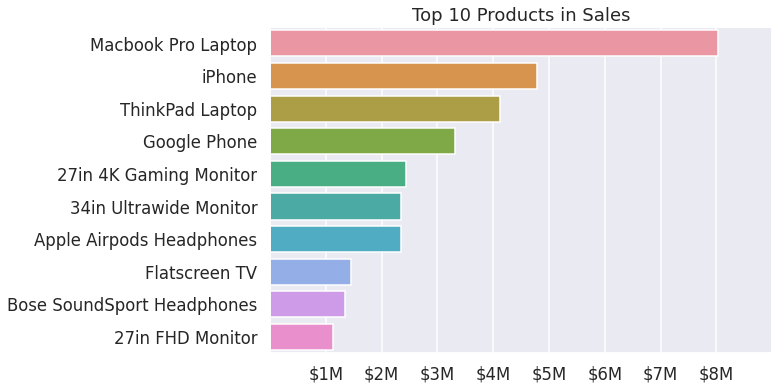

In [18]:
M = 10**6

sales_per_product_top_10 = sales_per_product.head(10)

plt.figure(figsize=(9, 6))
plt.title('Top 10 Products in Sales')

sns.barplot(x=sales_per_product_top_10.values, y=sales_per_product_top_10.index)

plt.xlabel(None)
xrange = range(M, 8*M+1, M)
xlabels = [f'${x//M}M' for x in xrange]
plt.xticks(xrange, xlabels)
plt.xlim(0, 9*M)

plt.ylabel(None)

plt.show()

### b) Which cities had the most sales?

In order to answer this question, we need add a column in ```sales``` with the purchase city. Note that we need both city and state in this new column cause we have have in our data two Portlands, one in Oregon and another in Maine.

In [19]:
def get_city(address):
    city = address.split(', ')[1]
    state = address.split()[-2]
    return f'{city}, {state}'

sales['purchase_city'] = sales['purchase_address'].apply(get_city)
sales

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,price_total,purchase_city
0,141234,iPhone,1,700.00,1900-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00,"Boston, MA"
1,141235,Lightning Charging Cable,1,14.95,1900-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95,"Portland, OR"
2,141236,Wired Headphones,2,11.99,1900-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98,"San Francisco, CA"
3,141237,27in FHD Monitor,1,149.99,1900-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99,"Los Angeles, CA"
4,141238,Wired Headphones,1,11.99,1900-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99,"Austin, TX"
...,...,...,...,...,...,...,...,...
185681,319666,Lightning Charging Cable,1,14.95,1900-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",14.95,"San Francisco, CA"
185682,319667,AA Batteries (4-pack),2,3.84,1900-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",7.68,"Los Angeles, CA"
185683,319668,Vareebadd Phone,1,400.00,1900-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",400.00,"Seattle, WA"
185684,319669,Wired Headphones,1,11.99,1900-12-03 10:39:00,"778 River St, Dallas, TX 75001",11.99,"Dallas, TX"


Now we can get the cities that had the most sales just grouping ```sales``` by city and summing the price total.

In [20]:
sales_per_city = sales.groupby('purchase_city')['price_total'].sum().sort_values(ascending=False)
sales_per_city

purchase_city
San Francisco, CA    8.25e+06
Los Angeles, CA      5.45e+06
New York City, NY    4.66e+06
Boston, MA           3.66e+06
Atlanta, GA          2.79e+06
Dallas, TX           2.77e+06
Seattle, WA          2.75e+06
Portland, OR         1.87e+06
Austin, TX           1.82e+06
Portland, ME         4.49e+05
Name: price_total, dtype: float64

Let's plot the cities that had the most sales.

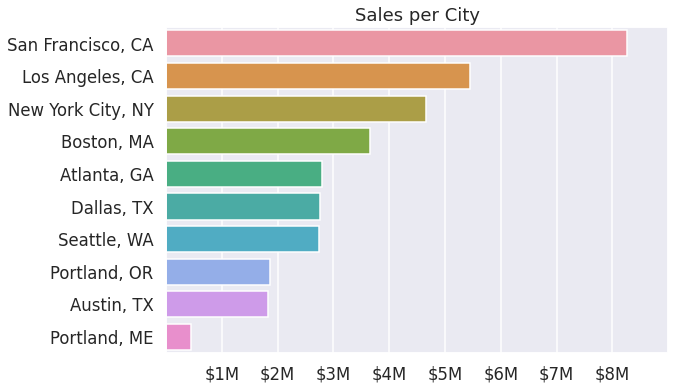

In [21]:
plt.figure(figsize=(9, 6))
plt.title('Sales per City')

sns.barplot(x=sales_per_city.values, y=sales_per_city.index)

plt.xlabel(None)
xrange = range(M, 8*M+1, M)
xlabels = [f'${x//M}M' for x in xrange]
plt.xticks(xrange, xlabels)
plt.xlim(0, 9*M)

plt.ylabel(None)

plt.show()

### c) Which hours had the most sales?

In order to answer this question, we need add a colummn in ```sales``` with the order hour.

In [22]:
sales['order_hour'] = sales['order_date'].dt.hour
sales

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,price_total,purchase_city,order_hour
0,141234,iPhone,1,700.00,1900-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00,"Boston, MA",21
1,141235,Lightning Charging Cable,1,14.95,1900-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95,"Portland, OR",14
2,141236,Wired Headphones,2,11.99,1900-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98,"San Francisco, CA",13
3,141237,27in FHD Monitor,1,149.99,1900-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99,"Los Angeles, CA",20
4,141238,Wired Headphones,1,11.99,1900-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99,"Austin, TX",11
...,...,...,...,...,...,...,...,...,...
185681,319666,Lightning Charging Cable,1,14.95,1900-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",14.95,"San Francisco, CA",20
185682,319667,AA Batteries (4-pack),2,3.84,1900-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",7.68,"Los Angeles, CA",12
185683,319668,Vareebadd Phone,1,400.00,1900-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",400.00,"Seattle, WA",6
185684,319669,Wired Headphones,1,11.99,1900-12-03 10:39:00,"778 River St, Dallas, TX 75001",11.99,"Dallas, TX",10


Now we can get the sales per hours just grouping ```sales``` by order hour and summing the price total.

In [23]:
sales_per_hour = sales.groupby('order_hour')['price_total'].sum()
sales_per_hour

order_hour
0     7.14e+05
1     4.61e+05
2     2.35e+05
3     1.46e+05
4     1.63e+05
        ...   
19    2.41e+06
20    2.28e+06
21    2.04e+06
22    1.61e+06
23    1.18e+06
Name: price_total, Length: 24, dtype: float64

Let's plot the sales in each hour.

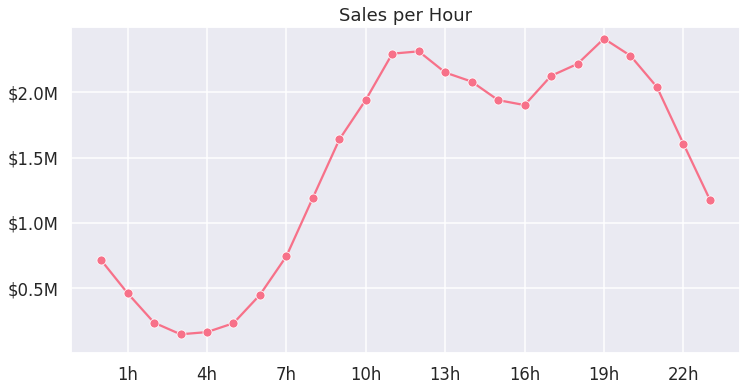

In [24]:
plt.figure(figsize=(12, 6))
plt.title('Sales per Hour')

sns.lineplot(x=sales_per_hour.index, y=sales_per_hour.values, marker='o')

plt.xlabel(None)
xrange = range(1, 24, 3)
xlabels = [f'{x}h' for x in xrange]
plt.xticks(xrange, xlabels)

plt.ylabel(None)
yrange = range(int(0.5*M), 2*M+1, int(0.5*M))
ylabels = [f'${y/M}M' for y in yrange]
plt.yticks(yrange, ylabels)
plt.ylim(0, int(2.5*M))

plt.show()

### d) Which months had the most sales?

In order to answer this question, we need add a colummn in ```sales``` with the order month.

In [25]:
sales['order_month'] = sales['order_date'].dt.month
sales

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,price_total,purchase_city,order_hour,order_month
0,141234,iPhone,1,700.00,1900-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00,"Boston, MA",21,1
1,141235,Lightning Charging Cable,1,14.95,1900-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95,"Portland, OR",14,1
2,141236,Wired Headphones,2,11.99,1900-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98,"San Francisco, CA",13,1
3,141237,27in FHD Monitor,1,149.99,1900-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99,"Los Angeles, CA",20,1
4,141238,Wired Headphones,1,11.99,1900-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99,"Austin, TX",11,1
...,...,...,...,...,...,...,...,...,...,...
185681,319666,Lightning Charging Cable,1,14.95,1900-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",14.95,"San Francisco, CA",20,12
185682,319667,AA Batteries (4-pack),2,3.84,1900-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",7.68,"Los Angeles, CA",12,12
185683,319668,Vareebadd Phone,1,400.00,1900-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",400.00,"Seattle, WA",6,12
185684,319669,Wired Headphones,1,11.99,1900-12-03 10:39:00,"778 River St, Dallas, TX 75001",11.99,"Dallas, TX",10,12


Now we can get the sales per month just grouping ```sales``` by month and summing the price total.

In [26]:
sales_per_month = sales.groupby('order_month')['price_total'].sum()
sales_per_month

order_month
1     1.82e+06
2     2.20e+06
3     2.80e+06
4     3.39e+06
5     3.15e+06
        ...   
8     2.24e+06
9     2.09e+06
10    3.73e+06
11    3.20e+06
12    4.61e+06
Name: price_total, Length: 12, dtype: float64

Let's plot the sales in each month.

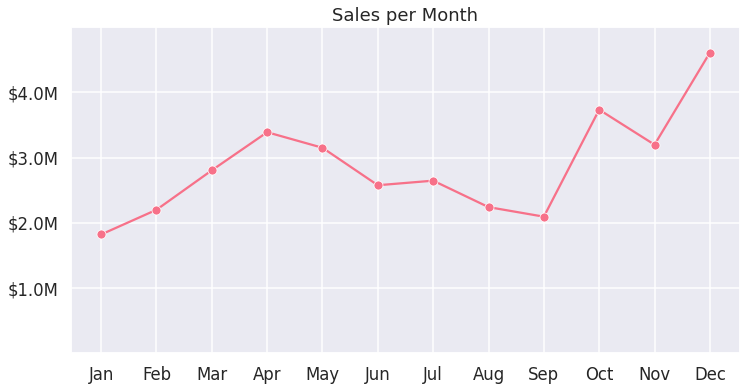

In [27]:
plt.figure(figsize=(12, 6))
plt.title('Sales per Month')

sns.lineplot(x=sales_per_month.index, y=sales_per_month.values, marker='o')

plt.xlabel(None)
plt.xticks(sales_per_month.index, list(calendar.month_abbr)[1:])

plt.ylabel(None)
yrange = range(M, 4*M+1, M)
ylabels = [f'${y/M}M' for y in yrange]
plt.yticks(yrange, ylabels)
plt.ylim(0, 5*M)

plt.show()

### e) Which products were most often sold together?

In order to answer this question, let's count all products pairs in each order.

For example, the order 302991 has three distinct products.

In [28]:
sales[sales['order_id'] == 302991]

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,price_total,purchase_city,order_hour,order_month
168367,302991,Google Phone,1,600.00,1900-12-26 07:48:00,"605 Washington St, Los Angeles, CA 90001",600.00,"Los Angeles, CA",7,12
168368,302991,USB-C Charging Cable,1,11.95,1900-12-26 07:48:00,"605 Washington St, Los Angeles, CA 90001",11.95,"Los Angeles, CA",7,12
168369,302991,Wired Headphones,2,11.99,1900-12-26 07:48:00,"605 Washington St, Los Angeles, CA 90001",23.98,"Los Angeles, CA",7,12


Let's create a list of all distinct products for each order. 

In [29]:
products_per_order = sales.groupby('order_id')['product'].apply(list)
products_per_order

order_id
141234                        [iPhone]
141235      [Lightning Charging Cable]
141236              [Wired Headphones]
141237              [27in FHD Monitor]
141238              [Wired Headphones]
                      ...             
319666      [Lightning Charging Cable]
319667         [AA Batteries (4-pack)]
319668               [Vareebadd Phone]
319669              [Wired Headphones]
319670    [Bose SoundSport Headphones]
Name: product, Length: 178437, dtype: object

We have a list of all distinct products for each order. See the example for the order 302991.

In [30]:
products_per_order.loc[302991]

['Google Phone', 'USB-C Charging Cable', 'Wired Headphones']

We can use the ```itertools``` module to get all possible pairs in each order. See the example for the order 302991.

In [31]:
list(itertools.combinations(products_per_order.loc[302991], 2))

[('Google Phone', 'USB-C Charging Cable'),
 ('Google Phone', 'Wired Headphones'),
 ('USB-C Charging Cable', 'Wired Headphones')]

Let's make this for each order and count the product pairs.

In [32]:
products_pairs_dict = {}
for products in products_per_order:
    pairs = itertools.combinations(sorted(products), 2)
    for pair in pairs:
        pair = ', '.join(pair)
        try:
            products_pairs_dict[pair] += 1
        except KeyError:
            products_pairs_dict[pair] = 1
            
products_pairs = pd.Series(products_pairs_dict, index=products_pairs_dict.keys()).sort_values(ascending=False)
products_pairs

Lightning Charging Cable, iPhone             1011
Google Phone, USB-C Charging Cable            997
Wired Headphones, iPhone                      462
Google Phone, Wired Headphones                422
Apple Airpods Headphones, iPhone              373
                                             ... 
Google Phone, LG Washing Machine                1
LG Dryer, Vareebadd Phone                       1
LG Dryer, ThinkPad Laptop                       1
AA Batteries (4-pack), LG Washing Machine       1
Google Phone, LG Dryer                          1
Length: 164, dtype: int64

Let's plot the top 10 products pairs that had the most orders.

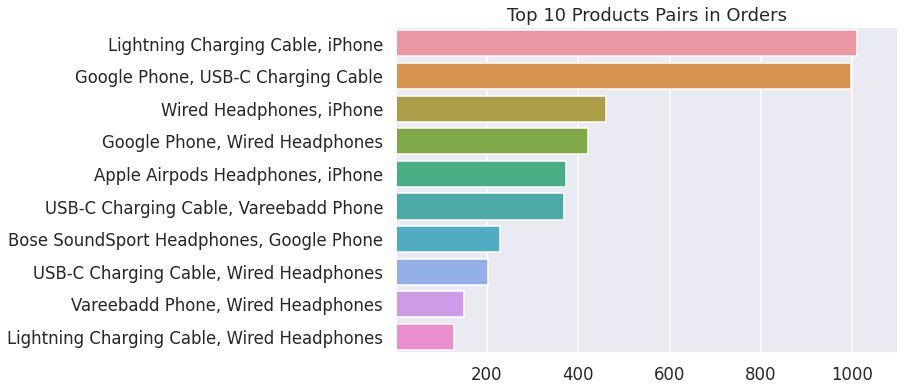

In [33]:
products_pairs_top_10 = products_pairs.head(10)

plt.figure(figsize=(9, 6))
plt.title('Top 10 Products Pairs in Orders')

sns.barplot(x=products_pairs_top_10.values, y=products_pairs_top_10.index)

plt.xlabel(None)
plt.xticks(range(200, 1000+1, 200))
plt.xlim(0, 1100)

plt.ylabel(None)

plt.show()